In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# How much profit are investors typically making from flipping houses in Boston?
sub-ideas
- what are some visualizations of general trajectories of flipped houses?
- What is the distribution of how long properties that are flipped are held.
- How does the sell price of targeted flipped house compare to those that are not flipped
- What is the profit distribution made by residential flips?

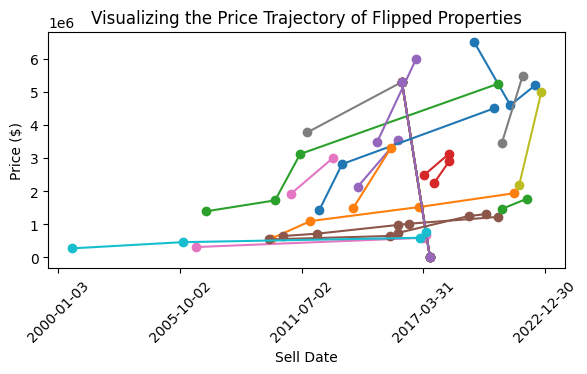

In [34]:
df = pd.read_csv('A2 (EDA) Datasets/Residential sales data in the City of Boston, 2000-2023/A2_EDA_Residential.csv')
#
df['date'] = pd.to_datetime(df['date'])
flipped = df[df['buy_side_flip'] == 1]
flipped
# Create a list to store matches for each flipped property
matches = []

# For each flipped property
i = 0
plt.figure(figsize=(6,4))
for idx, flip_row in flipped.iterrows():
    # Find all entries with same address
    i+=1
    if i >25:
        break
    same_address = df[df['address'] == flip_row['address']]
    matches.append(same_address)
    
    # Sort by date and plot price over time
    same_address_sorted = same_address.sort_values('date')
    
    plt.plot(same_address_sorted['date'], same_address_sorted['price'], marker='o')

# Get min and max dates
min_date = df['date'].min()
max_date = df['date'].max()
date_range = pd.date_range(min_date, max_date, periods=5)
plt.title(f'Visualizing the Price Trajectory of Flipped Properties')
plt.xlabel('Sell Date')
plt.ylabel('Price ($)')
plt.xticks(date_range.astype('O'), date_range.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.savefig('figs/q1/price_traj.png', dpi =300)
plt.show()


# # Combine all matches into a single dataframe
# all_matches = pd.concat(matches)

# # Remove duplicates
# all_matches = all_matches.drop_duplicates()

# all_matches


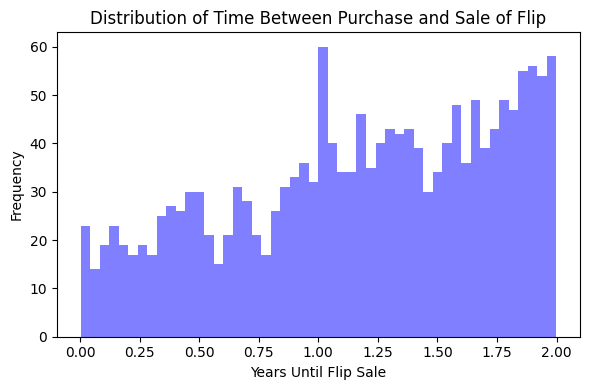

In [47]:
df = pd.read_csv('A2 (EDA) Datasets/Residential sales data in the City of Boston, 2000-2023/A2_EDA_Residential.csv')
#
df['date'] = pd.to_datetime(df['date'])
flipped = df[df['buy_side_flip'] == 1]
flipped
# Create a list to store matches for each flipped property
matches = []

# For each flipped property
i = 0
# Create list to store time differences
time_diffs = []

for idx, flip_row in flipped.iterrows():
    # Find all entries with same address
    same_address = df[df['address'] == flip_row['address']]
    # Get entries with dates after the flip date
    subsequent_sales = same_address[same_address['date'] > flip_row['date']]
    if len(subsequent_sales) > 0:
        # Find the next sale after the flip
        next_sale = subsequent_sales.loc[subsequent_sales['date'].idxmin()]
        
        # Calculate time difference in days
        time_diff = (next_sale['date'] - flip_row['date']).days / 365.25
        if time_diff < 2: time_diffs.append(time_diff)
        

plt.figure(figsize=(6,4))
plt.hist(time_diffs, bins=50, color = 'b', alpha = 0.5)
plt.title('Distribution of Time Between Purchase and Sale of Flip')
plt.xlabel('Years Until Flip Sale')
#plt.xlim(0,2.1)
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('figs/q1/flip_times_hist.png', dpi=300)
plt.show()


# # Combine all matches into a single dataframe
# all_matches = pd.concat(matches)

# # Remove duplicates
# all_matches = all_matches.drop_duplicates()

# all_matches


Flipped Properties - Min: $1.00, Max: $25,200,000.00
Non-Flipped Properties - Min: $1.00, Max: $999,999,999.00


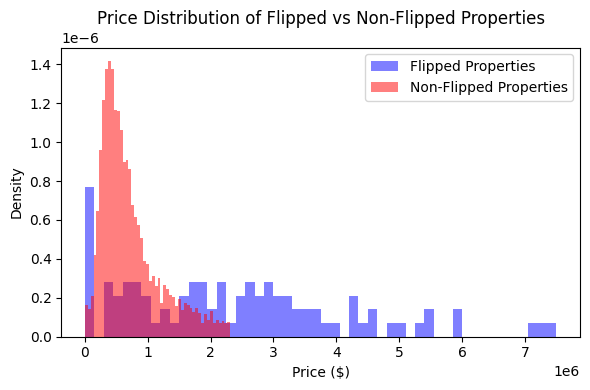

In [61]:
df = pd.read_csv('A2 (EDA) Datasets/Residential sales data in the City of Boston, 2000-2023/A2_EDA_Residential.csv')
df['date'] = pd.to_datetime(df['date'])
flipped = df[df['buy_side_flip'] == 1]

# Get subsequent sale prices for flipped properties
i = 0
flipped_prices = []
for idx, flip_row in flipped.iterrows():
    same_address = df[df['address'] == flip_row['address']]
    subsequent_sales = same_address[same_address['date'] > flip_row['date']]
    i+=1
    if i > 100:
        break
    if len(subsequent_sales) > 0:
        next_sale = subsequent_sales.loc[subsequent_sales['date'].idxmin()]
        flipped_prices.append(next_sale['price'])

# Get prices for non-flipped properties
non_flipped_addresses = set(df[df['buy_side_flip'] == 0]['address'])
non_flipped_prices = df[df['address'].isin(non_flipped_addresses)]['price']
plt.figure(figsize=(6,4))
print(f"Flipped Properties - Min: ${min(flipped_prices):,.2f}, Max: ${max(flipped_prices):,.2f}")
print(f"Non-Flipped Properties - Min: ${min(non_flipped_prices):,.2f}, Max: ${max(non_flipped_prices):,.2f}")
# Remove outliers using IQR method
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return [x for x in data if lower <= x <= upper]

flipped_no_outliers = remove_outliers(flipped_prices)
non_flipped_no_outliers = remove_outliers(non_flipped_prices)

plt.hist(flipped_no_outliers, bins=50, color='b', alpha=0.5, density=True, label='Flipped Properties')
plt.hist(non_flipped_no_outliers, bins=50, color='r', alpha=0.5, density=True, label='Non-Flipped Properties')
plt.title('Price Distribution of Flipped vs Non-Flipped Properties')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('figs/q1/price_distribution.png', dpi=300)
plt.show()


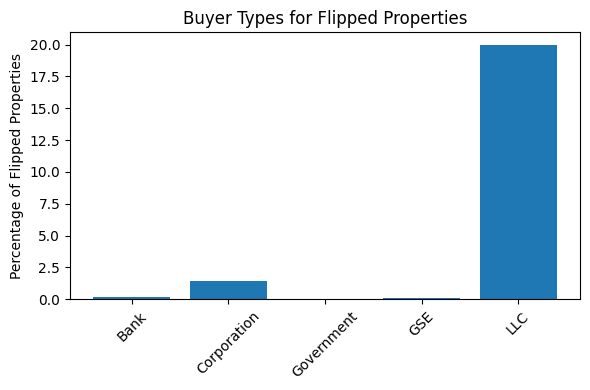

In [62]:
df = pd.read_csv('A2 (EDA) Datasets/Residential sales data in the City of Boston, 2000-2023/A2_EDA_Residential.csv')
df['date'] = pd.to_datetime(df['date'])
flipped = df[df['buy_side_flip'] == 1]
# Calculate percentage of each buyer type
buyer_types = ['buyer_bnk_ind', 'buyer_bus_ind', 'buyer_gov_ind', 'buyer_gse_ind', 'buyer_llc_ind']
buyer_labels = ['Bank', 'Corporation', 'Government', 'GSE', 'LLC']
percentages = []

for col in buyer_types:
    pct = (flipped[col].sum() / len(flipped)) * 100
    percentages.append(pct)

plt.figure(figsize=(6,4))
plt.bar(buyer_labels, percentages)
plt.title('Buyer Types for Flipped Properties')
plt.ylabel('Percentage of Flipped Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figs/q1/buyer_types.png', dpi=300)
plt.show()


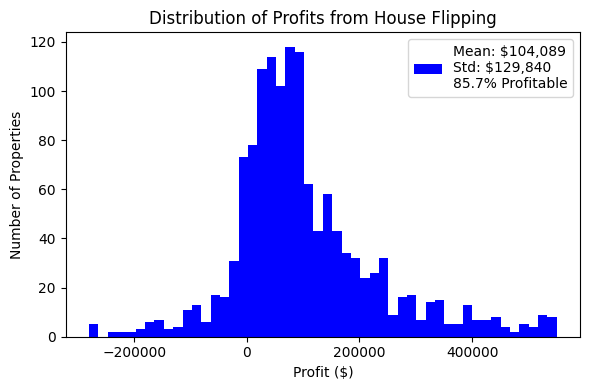

In [64]:
df = pd.read_csv('A2 (EDA) Datasets/Residential sales data in the City of Boston, 2000-2023/A2_EDA_Residential.csv')
df['date'] = pd.to_datetime(df['date'])
flipped = df[df['buy_side_flip'] == 1]

# Get profits from flipped properties
profits = []

for idx, flip_row in flipped.iterrows():
    same_address = df[df['address'] == flip_row['address']]
    subsequent_sales = same_address[same_address['date'] > flip_row['date']]
    
    if len(subsequent_sales) > 0:
        next_sale = subsequent_sales.loc[subsequent_sales['date'].idxmin()]
        profit = next_sale['price'] - flip_row['price']
        profits.append(profit)

# Remove outliers using IQR method
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return [x for x in data if lower <= x <= upper]

profits_no_outliers = remove_outliers(profits)

# Calculate statistics
mean_profit = np.mean(profits_no_outliers)
std_profit = np.std(profits_no_outliers)
pct_profitable = (sum(p > 0 for p in profits_no_outliers) / len(profits_no_outliers)) * 100

plt.figure(figsize=(6,4))
plt.hist(profits_no_outliers, bins=50, color='b', 
         label=f'Mean: ${mean_profit:,.0f}\nStd: ${std_profit:,.0f}\n{pct_profitable:.1f}% Profitable')
plt.title('Distribution of Profits from House Flipping')
plt.xlabel('Profit ($)')
plt.ylabel('Number of Properties')
plt.legend()
plt.tight_layout()
plt.savefig('figs/q1/flip_profits.png', dpi=300)
plt.show()
